# Exercise 3: formation control

In [59]:
# header to start
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mp

import pickle
import IPython

import scipy.linalg

We wish the control the formation of 4 robots randomly distributed in the environment to keep the formation shown in the figure of Exercise 2. 


## Question 1
Assume each agent has state space dynamics $\dot{\mathbf{p}}_i =\mathbf{u}_i$, with $\mathbf{u}_i$ in $\mathbb{R}^2$ and $\mathbf{u} = [\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3, \mathbf{u}_4]$.

Implement the second order linear control law seen in the class
$$\mathbf{u} = -k \mathbf{L} \mathbf{x} + k \mathbf{D z}_{ref}$$

where $k>0$ is a positive gain and $\mathbf{D}$ is the incidence matrix of the graph.


Simulate the control law for several random initial conditions of the agents (in 2D). What do you observe? How does it compare to the same control law but for a framework with a complete graph?



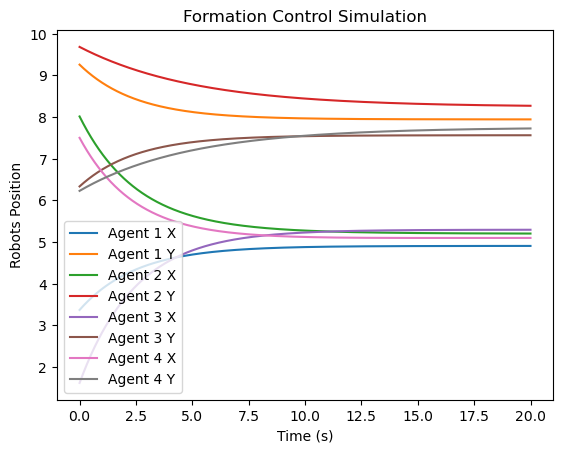

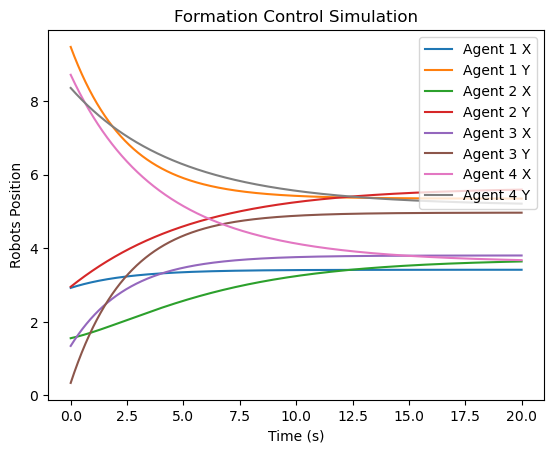

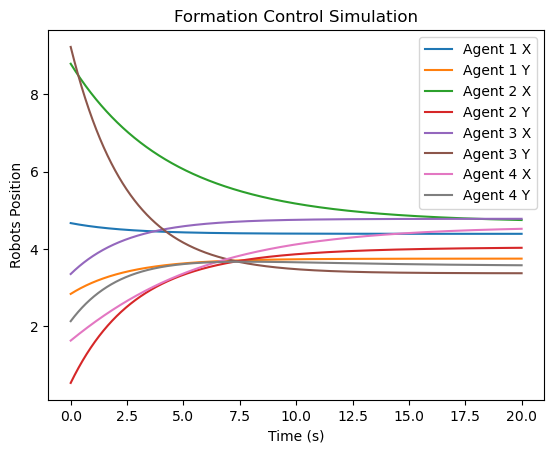

In [60]:
Adj=np.array([[1,1,0,0,0],[1,1,1,0,0],[0,1,1,1,1],[0,0,1,1,1],[0,0,1,1,1]]) 
Deg=np.array([[1,0,0,0,0],[0,2,0,0,0],[0,0,3,0,0],[0,0,0,2,0],[0,0,0,0,2]])
L=Adj-Deg
incidenceMatrix=np.array([[-1,0,1,-1,0],[1,-1,0,0,0],[0,1,-1,0,-1],[0,0,0,1,1]])

z_ref=[]

k=0.1

def simFormation(positions, T, L, incidenceMatrix, z_ref, k, dt=0.001):
    """
    Simulates the formation control over time.

    Args:
        positions: Initial positions of the agents (shape: (num_agents, 2)).
        T: Total simulation time.
        L: Laplacian matrix of the graph.
        incidenceMatrix: Incidence matrix of the graph.
        z_ref: Desired relative positions (shape: (num_edges, 2)).
        k: Control gain.
        dt: Time step for the simulation.

    Returns:
        reshaped_x: A 2D array where each row alternates between x and y positions for all agents at a given time step.
    """
    time_arr = np.arange(0, T, dt)
    num_agents = positions.shape[0]

    # Initialize position array for all time steps
    x = np.zeros((num_agents, 2, len(time_arr)))
    x[:, :, 0] = positions  # Set initial positions

    # Initialize control arrays for x and y
    x_control = np.zeros((num_agents, len(time_arr)))
    y_control = np.zeros((num_agents, len(time_arr)))

    # Simulate formation control
    for i in range(len(time_arr) - 1):
        # Compute control inputs for x and y
        x_control[:, i] = -k * np.dot(L, x[:, 0, i]) + k * np.dot(incidenceMatrix, z_ref[:, 0])
        y_control[:, i] = -k * np.dot(L, x[:, 1, i]) + k * np.dot(incidenceMatrix, z_ref[:, 1])

        # Update positions using control inputs
        x[:, 0, i + 1] = x[:, 0, i] + x_control[:, i] * dt
        x[:, 1, i + 1] = x[:, 1, i] + y_control[:, i] * dt

    # Plot positions over time
    for j in range(num_agents):
        plt.plot(time_arr, x[j, 0, :], label=f'Agent {j + 1} X')
        plt.plot(time_arr, x[j, 1, :], label=f'Agent {j + 1} Y')

    plt.ylabel('Robots Position')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.title('Formation Control Simulation')
    plt.show()

    # Reshape the output to match the format of plotx
    reshaped_x = x.reshape(2 * num_agents, len(time_arr)).T
    return reshaped_x



def getLaplacianMatrix(edgesA,Vertices):
    
    adjencyMatrix = np.zeros((len(Vertices),len(Vertices)))
    for edge in edgesA:
        i = edge[1]  #head
        j = edge[0]  #tail
        adjencyMatrix[i][j] = 1
    
    #print("Adjacency Matrix is: ",adjencyMatrix)
    row_sums = np.sum(adjencyMatrix, axis=1)
    diagonal_matrix = np.diag(row_sums)
    #print("\nDegree Matrix is: ",diagonal_matrix)
    return diagonal_matrix - adjencyMatrix


Edges=np.array([[0,1],[0,2],[0,3],[1,0],[2,0],[3,0],[1,2],[2,1],[2,3],[3,2]])
Vertices=np.array([0,1,2,3])



Laplacian=getLaplacianMatrix(Edges,Vertices)


#random initial positions
positions = np.array([
    [0.0, 0.0],  # Agent 1 starts at (0, 0)
    [1.0, 0.0],  # Agent 2 starts at (1, 0)
    [0.0, 1.0],  # Agent 3 starts at (0, 1)
    [1.0, 1.0]   # Agent 4 starts at (1, 1)
])
positions= np.random.rand(4, 2) * 10

# If we take 1 to 2, 2 to 3, 3 to 1, 1 to 4 and 3 to 4
z_ref = np.array([
    [1.695, 0.98],  # Edge 1: Desired relative position (x, y)
    [1.5, 0.0],  # Edge 2: Desired relative position (x, y)
    [0.82, 1.25], # Edge 3: Desired relative position (x, y)
    [0.0, 0.0], # Edge 4: Desired relative position (x, y)
    [0.0, 0.0]   # Edge 5: Desired relative position (x, y)
])
newfunc=simFormation(positions, 20, Laplacian, incidenceMatrix, z_ref, k, dt=0.001)

positions2= np.random.rand(4, 2) * 10
newfunc2=simFormation(positions2, 20, Laplacian, incidenceMatrix, z_ref, k, dt=0.001)

positions3= np.random.rand(4, 2) * 10
newfunc3=simFormation(positions3, 20, Laplacian, incidenceMatrix, z_ref, k, dt=0.001)



## Question 2
Assume each agent has state space dynamics $\dot{\mathbf{p}}_i =\mathbf{u}_i$, with $\mathbf{u}_i$ in $\mathbb{R}^2$ and $\mathbf{u} = [\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3, \mathbf{u}_4]$.

We now consider the following control law
$$\begin{equation}
\mathbf{u} = \mathbf{R}_\mathcal{G}^T(\mathbf{p}) (\mathbf{g}_d - \mathbf{g}_\mathcal{G}(\mathbf{p}))
\end{equation}$$
where $\mathbf{R}_\mathcal{G}$ is the rigidity matrix associated to the graph of the framework, $\mathbf{g}_d$ is the vector of desired square distance between agents and $\mathbf{g}_\mathcal{G}$ is the measured square distance between each agent.

Simulate the control law for several random initial conditions of the agents (in 2D). What do you observe? How does it compare to the same control law but for a framework with a complete graph?


In [61]:
def rigidityMatrix(p):

  x1, y1, x2, y2, x3, y3, x4, y4 = p

  R_G = np.array([
      [-2 * (x1 - x2), 2 * (y1 - y2), -2 * (x1 - x2), -2 * (y1 - y2), 0, 0, 0, 0],
      [0, 0, 2 * (x2 - x3), 2 * (y2 - y3), -2 * (x2 - x3),-2 * (y2 - y3), 0, 0],
      [-2 * (x3 - x1), -2 * (y3 - y1), 0, 0, 2 * (x3 - x1), 2 * (y3 - y1),0,0],
      [0, 0, 0, 0, 2 * (x3 - x4), 2 * (y3 - y4), -2 * (x3 - x4), -2 * (y3 - y4)],
      [-2 * (x4 - x1), -2 * (y4- y1),0,0,0,0,  2 * (x4 - x1), 2 * (y4 - y1) ]
  ])

  return R_G

def simFormationRigid(positions, T, L, incidenceMatrix, z_ref, k, dt=0.001):
    """
    Simulates the formation control over time.

    Args:
        positions: Initial positions of the agents (shape: (num_agents, 2)).
        T: Total simulation time.
        L: Laplacian matrix of the graph.
        incidenceMatrix: Incidence matrix of the graph.
        z_ref: Desired relative positions (shape: (num_edges, 2)).
        k: Control gain.
        dt: Time step for the simulation.

    Returns:
        reshaped_x: A 2D array where each row alternates between x and y positions for all agents at a given time step.
    """
    time_arr = np.arange(0, T, dt)
    num_agents = positions.shape[0]



    distancesGoal= np.array([1, 2, 1.5**2, 1.5**2, 1])
    rigidityMatrix = np.array([
      [-2 * (x1 - x2), 2 * (y1 - y2), -2 * (x1 - x2), -2 * (y1 - y2), 0, 0, 0, 0],
      [0, 0, 2 * (x2 - x3), 2 * (y2 - y3), -2 * (x2 - x3),-2 * (y2 - y3), 0, 0],
      [-2 * (x3 - x1), -2 * (y3 - y1), 0, 0, 2 * (x3 - x1), 2 * (y3 - y1),0,0],
      [0, 0, 0, 0, 2 * (x3 - x4), 2 * (y3 - y4), -2 * (x3 - x4), -2 * (y3 - y4)],
      [-2 * (x4 - x1), -2 * (y4- y1),0,0,0,0,  2 * (x4 - x1), 2 * (y4 - y1) ]
    ])
    realDistances = np.array([(x2 - x1)**2 + (y2 - y1)**2, (x3 - x1)**2 + (y3 - y1)**2, (x4 - x1)**2 + (y4 - y1)**2,      (x3 - x4)**2 + (y3 - y4)**2,(x3 - x2)**2 + (y3 - y2)**2])

    # Initialize position array for all time steps
    x = np.zeros((num_agents, 2, len(time_arr)))
    x[:, :, 0] = positions  # Set initial positions

    # Initialize control arrays for x and y
    x_control = np.zeros((num_agents, len(time_arr)))
    y_control = np.zeros((num_agents, len(time_arr)))

    # Simulate formation control
    for i in range(len(time_arr) - 1):
        
        u=np.transpose(rigidityMatrix)@np.transpose(distancesGoal-realDistances)

        # Compute control inputs for x and y
        x_control[:, i] = -k * np.dot(L, x[:, 0, i]) + k * np.dot(incidenceMatrix, z_ref[:, 0])
        y_control[:, i] = -k * np.dot(L, x[:, 1, i]) + k * np.dot(incidenceMatrix, z_ref[:, 1])

        # Update positions using control inputs
        x[:, 0, i + 1] = x[:, 0, i] + x_control[:, i] * dt
        x[:, 1, i + 1] = x[:, 1, i] + y_control[:, i] * dt

    # Plot positions over time
    for j in range(num_agents):
        plt.plot(time_arr, x[j, 0, :], label=f'Agent {j + 1} X')
        plt.plot(time_arr, x[j, 1, :], label=f'Agent {j + 1} Y')

    plt.ylabel('Robots Position')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.title('Formation Control Simulation')
    plt.show()

    # Reshape the output to match the format of plotx
    reshaped_x = x.reshape(2 * num_agents, len(time_arr)).T
    return reshaped_x


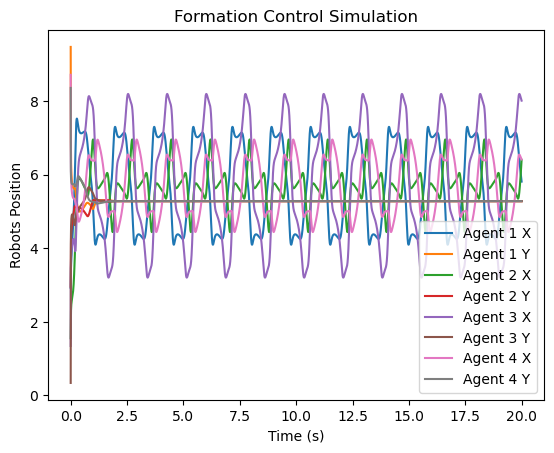

In [62]:
def simFormation(positions, T, distancesGoal, dt=0.001):
    """
    Simulates the formation control over time using the rigidity matrix.

    Args:
        positions: Initial positions of the agents (shape: (num_agents, 2)).
        T: Total simulation time.
        rigidityMatrix: The rigidity matrix of the graph (shape: (num_edges, 2 * num_agents)).
        distancesGoal: Desired distances between connected agents (shape: (num_edges,)).
        dt: Time step for the simulation.

    Returns:
        reshaped_x: A 2D array where each row alternates between x and y positions for all agents at a given time step.
    """
    time_arr = np.arange(0, T, dt)
    num_agents = positions.shape[0]

    # Initialize position array for all time steps
    x = np.zeros((num_agents, 2, len(time_arr)))
    x[:, :, 0] = positions  # Set initial positions

    # Simulate formation control
    for i in range(len(time_arr) - 1):
        # Flatten positions into a single vector [x1, y1, x2, y2, ...]
        positions_flat = x[:, :, i].flatten()

        x1, y1, x2, y2, x3, y3, x4, y4 = positions_flat
  

        rigidityMatrix = np.array([
        [-2 * (x1 - x2), 2 * (y1 - y2), -2 * (x1 - x2), -2 * (y1 - y2), 0, 0, 0, 0],
        [0, 0, 2 * (x2 - x3), 2 * (y2 - y3), -2 * (x2 - x3),-2 * (y2 - y3), 0, 0],
        [-2 * (x3 - x1), -2 * (y3 - y1), 0, 0, 2 * (x3 - x1), 2 * (y3 - y1),0,0],
        [0, 0, 0, 0, 2 * (x3 - x4), 2 * (y3 - y4), -2 * (x3 - x4), -2 * (y3 - y4)],
        [-2 * (x4 - x1), -2 * (y4- y1),0,0,0,0,  2 * (x4 - x1), 2 * (y4 - y1) ]
      ])

        # Compute real distances between connected agents
        #realDistances = np.linalg.norm(rigidityMatrix @ positions_flat, axis=1)
        realDistances= np.array([
            (x2 - x1)**2 + (y2 - y1)**2,
            (x3 - x1)**2 + (y3 - y1)**2,
            (x4 - x1)**2 + (y4 - y1)**2,
            (x3 - x4)**2 + (y3 - y4)**2,
            (x3 - x2)**2 + (y3 - y2)**2
        ])

        # Compute control input U using the rigidity matrix
        U_flat = rigidityMatrix.T @ (distancesGoal - realDistances)

        # Reshape U_flat back into (num_agents, 2) for x and y updates
        U = U_flat.reshape(num_agents, 2)

        # Update positions using control input U
        x[:, :, i + 1] = x[:, :, i] + U * dt

    # Plot positions over time
    for j in range(num_agents):
        plt.plot(time_arr, x[j, 0, :], label=f'Agent {j + 1} X')
        plt.plot(time_arr, x[j, 1, :], label=f'Agent {j + 1} Y')

    plt.ylabel('Robots Position')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.title('Formation Control Simulation')
    plt.show()

    # Reshape the output to match the format of plotx
    reshaped_x = x.reshape(2 * num_agents, len(time_arr)).T
    return reshaped_x

    # Define initial positions (x and y for each agent)
positions = np.array([
    [0.0, 0.0],  # Agent 1
    [1.0, 0.0],  # Agent 2
    [0.0, 1.0],  # Agent 3
    [1.0, 1.0]   # Agent 4
])

# Define desired distances between connected agents
distancesGoal= np.array([1, 2, 1.5**2, 1.5**2, 1])

# Simulate the formation control
plotx = simFormation(positions2, T=20, distancesGoal=distancesGoal, dt=0.001)



## Question 3

How would you compare both control laws? What are the pros and cons of each of them?

I attribute the oscillation in the rigidity control due to initial conditions, but it is more independent of global locations, and more based on simple distances between the robots.

## Helper function to display results

This function can be used to display the behavior of the robots in 2D

In [63]:
def make_animation(plotx,E,xl=(-2,2),yl=(-2,2),inter=25, display=False):
    '''
    takes a graph and motion of vertexes in 2D and returns an animation
    E: list of edges (each edge is a pair of vertexes)
    plotx: a matrix of states ordered as (x1, y1, x2, y2, ..., xn, yn) in the rows and time in columns
    xl and yl define the display boundaries of the graph
    inter is the interval between each point in ms
    '''
    fig = mp.figure.Figure()
    mp.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=xl, ylim=yl)
    ax.grid()

    list_of_lines = []
    for i in E: #add as many lines as there are edges
        line, = ax.plot([], [], 'o-', lw=2)
        list_of_lines.append(line)

    def animate(i):
        for e in range(len(E)):
            vx1 = plotx[2*E[e][0],i]
            vy1 = plotx[2*E[e][0]+1,i]
            vx2 = plotx[2*E[e][1],i]
            vy2 = plotx[2*E[e][1]+1,i]
            list_of_lines[e].set_data([vx1,vx2],[vy1,vy2])
        return list_of_lines
    
    def init():
        return animate(0)


    ani = animation.FuncAnimation(fig, animate, np.arange(0, len(plotx[0,:])),
        interval=inter, blit=True, init_func=init)
    plt.close(fig)
    plt.close(ani._fig)
    if(display==True):
        IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))
    return ani

In [64]:
# for example assume that you have simulated a formation control in 2D and stored the data in a file
# we load the data needed for the display
with open('example_animation.pickle', 'rb') as f:
    data = pickle.load(f)

# this is the list of edges (as we usually define them for an undirected graph)
E = data['E']
print('the list of edges is:')
print(E)

# this is the time of simulation
t = data['t']

# this is an array containing the evolution of the states of the robot
# x[0,:] contains the time evolution of the x variable of robot 1
# x[1,:] contains the time evolution of the y variable of robot 1
# x[2,:] contains the time evolution of the x variable of robot 2
# etc
x = data['x']

# since we simulated with a small delta t = 0.001, we want to subsample for display
# we just take data every 50ms
plotx = x[:,::50]

#make_animation(newfunc, [(0, 1), (1, 2), (2, 3), (3, 0)], inter=50, display=True)

# a video showing the behavior of the robots and the connection between the robots should be displayed below

the list of edges is:
[[0, 1], [0, 2], [0, 3], [1, 2], [2, 3]]
